# Goal 
This post aims to introduce how to train the image classifier for MNIST dataset using PyTorch

![image](https://user-images.githubusercontent.com/8764683/59977812-c7f6e380-9610-11e9-8a22-25f215a9a2e8.png)

**Reference**
* [PyTorch Documentation - TORCHVISION.DATASETS](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist)
* [PyTorch Tutorial - TRAINING A CLASSIFIER](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
* [Kaggle kernel - CNN with Pytorch for MNIST ](https://www.kaggle.com/sdelecourt/cnn-with-pytorch-for-mnist)

# Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset
from sklearn.datasets import load_digits

# PyTorch
import torch 
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# Functions

In [32]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Load MNIST dataset

When downloading the image dataset, we also need to define `transform` function that apply pixel normalization from [0, 1] to [-1, +1]


In [50]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

trainset = torchvision.datasets.MNIST(root='~/data', 
                                        train=True,
                                        download=True,
                                        transform=transform)

testset = torchvision.datasets.MNIST(root='~/data', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)


9920512it [00:28, 1582029.76it/s]                             

1654784it [00:23, 573182.07it/s]                             

## Create a dataloader

In [13]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=2)

In [14]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=100,
                                         shuffle=False,
                                         num_workers=2)

# Define a model

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # 28x28x32 -> 26x26x32
        self.conv2 = nn.Conv2d(32, 64, 3)  # 26x26x64 -> 24x24x64
        self.pool = nn.MaxPool2d(2, 2)  # 24x24x64 -> 12x12x64
        self.dropout1 = nn.Dropout2d()
        self.fc1 = nn.Linear(12 * 12 * 64, 128)
        self.dropout2 = nn.Dropout2d()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 12 * 12 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# Create a loss function and optimizer

In [10]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training a model

In [22]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i+1}] loss: {running_loss / 100:.2}')
            running_loss = 0.0

print('Finished Training')

[1, 100] loss: 1.5
[1, 200] loss: 0.82
[1, 300] loss: 0.63
[1, 400] loss: 0.55
[1, 500] loss: 0.5
[1, 600] loss: 0.46
[2, 100] loss: 0.42
[2, 200] loss: 0.4
[2, 300] loss: 0.38
[2, 400] loss: 0.38
[2, 500] loss: 0.34
[2, 600] loss: 0.34
[3, 100] loss: 0.31
[3, 200] loss: 0.31
[3, 300] loss: 0.29
[3, 400] loss: 0.28
[3, 500] loss: 0.28
[3, 600] loss: 0.26
[4, 100] loss: 0.24
[4, 200] loss: 0.24
[4, 300] loss: 0.24
[4, 400] loss: 0.23
[4, 500] loss: 0.23
[4, 600] loss: 0.22
[5, 100] loss: 0.2
[5, 200] loss: 0.21
[5, 300] loss: 0.2
[5, 400] loss: 0.19
[5, 500] loss: 0.19
[5, 600] loss: 0.19
Finished Training


# Test 

In [37]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images)
_, predicted = torch.max(outputs, 1)

,0,1,2,3,4,5,6,7,8,9
Ground Truth,7,2,1,0,4,1,4,9,5,9
Predicted label,7,2,1,0,4,1,4,9,6,9


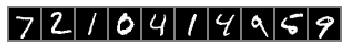

In [48]:
n_test = 10
df_result = pd.DataFrame({
    'Ground Truth': labels[:n_test],
    'Predicted label': predicted[:n_test]})
display(df_result.T)
imshow(torchvision.utils.make_grid(images[:n_test, :, :, :], nrow=n_test))